>>>>> # <p style ="color:maroon;">**INTERNSHIP PROJECT**     

>>>> #            ***TOPIC <p style ="color:green;"> COVID 19 DATA ANALYSIS AND CASE PREDICTION***  
-BY Nitish Kumar Gupta


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np


**Importing main dataset**

In [2]:
df=pd.read_csv('covid_19_india_latest.csv',parse_dates=['Date'],dayfirst=True)

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


**Keeping only required columns**

In [4]:
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming the columns name
df.columns=['date','state','cured','deaths','confirmed']

In [5]:
#looking at the earliest dates
df

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [6]:
#Loooking at the latest Dates
df.tail()

,date,state,cured,deaths,confirmed
4666,2020-07-30,Telengana,43751,492,58906
4667,2020-07-30,Tripura,2678,21,4485
4668,2020-07-30,Uttarakhand,3811,72,6866
4669,2020-07-30,Uttar Pradesh,45807,1530,77334
4670,2020-07-30,West Bengal,44116,1490,65258


In [7]:
#current date
today=df[df.date == '2020-07-30']

In [8]:
today

,date,state,cured,deaths,confirmed
4636,2020-07-30,Andaman and Nicobar Islands,201,2,428
4637,2020-07-30,Andhra Pradesh,55406,1213,120390
4638,2020-07-30,Arunachal Pradesh,677,3,1410
4639,2020-07-30,Assam,27832,92,36295
4640,2020-07-30,Bihar,30320,278,46080
4641,2020-07-30,Chandigarh,611,14,978
4642,2020-07-30,Chhattisgarh,5636,48,8539
4643,2020-07-30,Dadra and Nagar Haveli and Daman and Diu,648,2,1026
4644,2020-07-30,Delhi,118633,3907,133310
4645,2020-07-30,Goa,3784,39,5489


**sorting data w.r.t number of confirmed cases**

In [9]:
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
4655,2020-07-30,Maharashtra,239755,14463,400651
4665,2020-07-30,Tamil Nadu,172883,3741,234114
4644,2020-07-30,Delhi,118633,3907,133310
4637,2020-07-30,Andhra Pradesh,55406,1213,120390
4651,2020-07-30,Karnataka,42901,2147,112504
4669,2020-07-30,Uttar Pradesh,45807,1530,77334
4670,2020-07-30,West Bengal,44116,1490,65258
4646,2020-07-30,Gujarat,43195,2396,59126
4666,2020-07-30,Telengana,43751,492,58906
4640,2020-07-30,Bihar,30320,278,46080


In [10]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]#return first five records

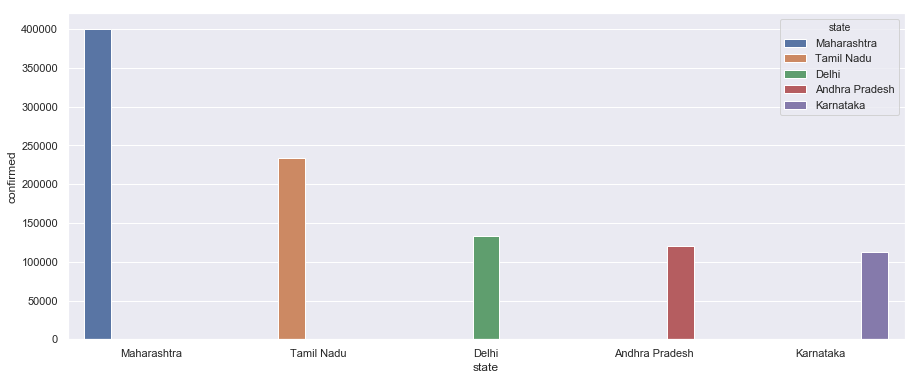

In [11]:

sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [12]:
max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
4655,2020-07-30,Maharashtra,239755,14463,400651
4644,2020-07-30,Delhi,118633,3907,133310
4665,2020-07-30,Tamil Nadu,172883,3741,234114
4646,2020-07-30,Gujarat,43195,2396,59126
4651,2020-07-30,Karnataka,42901,2147,112504
4669,2020-07-30,Uttar Pradesh,45807,1530,77334
4670,2020-07-30,West Bengal,44116,1490,65258
4637,2020-07-30,Andhra Pradesh,55406,1213,120390
4654,2020-07-30,Madhya Pradesh,20934,843,30134
4663,2020-07-30,Rajasthan,27569,650,38964


In [13]:
top_states_death=max_death_cases[0:5]

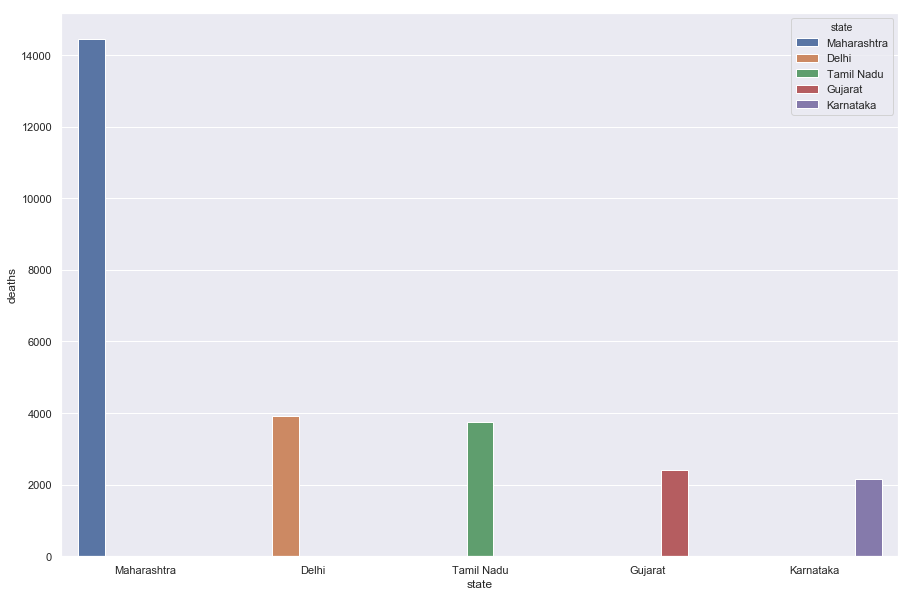

In [14]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

In [15]:
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
4655,2020-07-30,Maharashtra,239755,14463,400651
4665,2020-07-30,Tamil Nadu,172883,3741,234114
4644,2020-07-30,Delhi,118633,3907,133310
4637,2020-07-30,Andhra Pradesh,55406,1213,120390
4669,2020-07-30,Uttar Pradesh,45807,1530,77334
4670,2020-07-30,West Bengal,44116,1490,65258
4666,2020-07-30,Telengana,43751,492,58906
4646,2020-07-30,Gujarat,43195,2396,59126
4651,2020-07-30,Karnataka,42901,2147,112504
4640,2020-07-30,Bihar,30320,278,46080


In [16]:
top_states_cured=max_cured_cases[0:5]

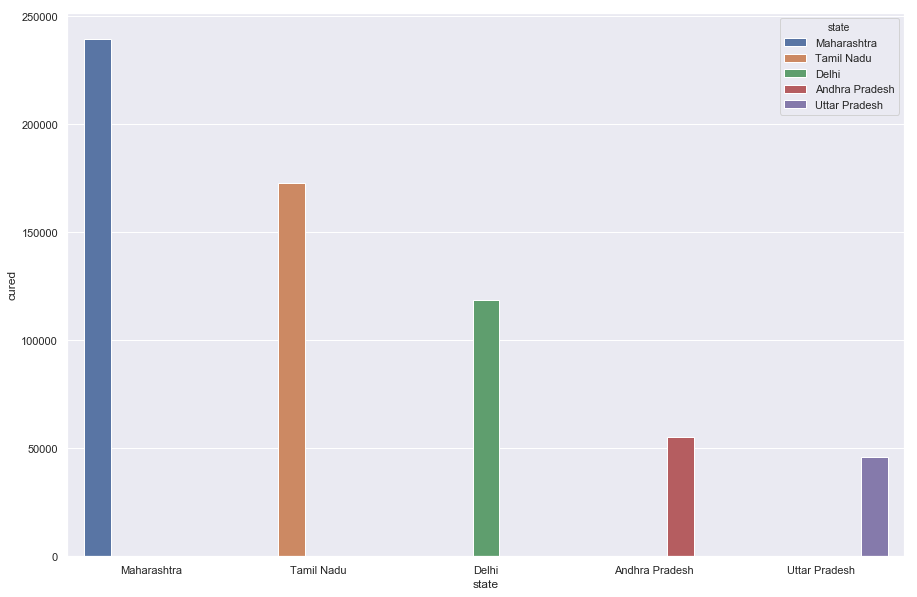

In [17]:
#Making bar-plot for states with top cured cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

In [18]:
#Maharashtra
maha=df[df.state=='Maharashtra']
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
146,2020-03-14,Maharashtra,0,0,14
153,2020-03-15,Maharashtra,0,0,32
167,2020-03-16,Maharashtra,0,0,32
182,2020-03-17,Maharashtra,0,1,39
197,2020-03-18,Maharashtra,0,1,42


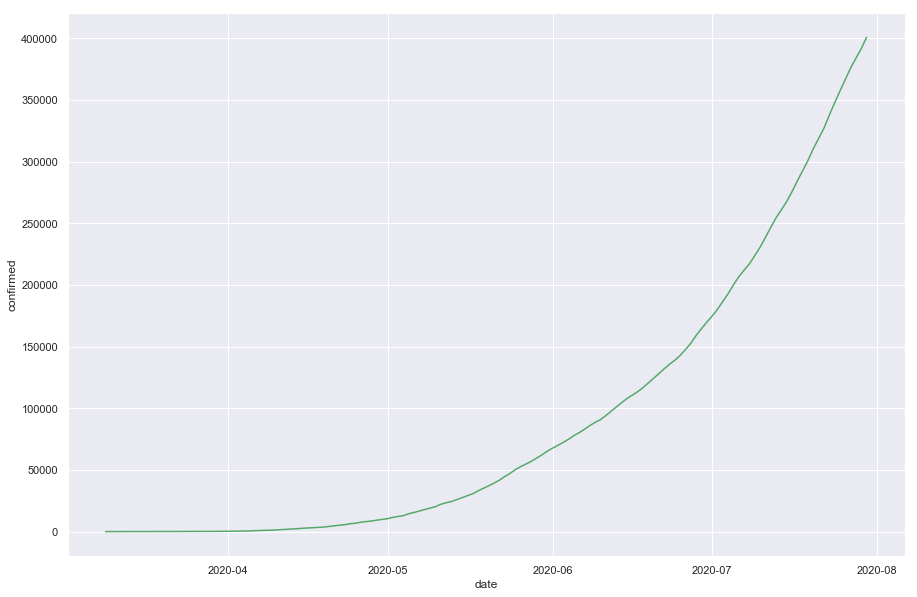

In [19]:
#Visualizing confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")#color=green
plt.show()

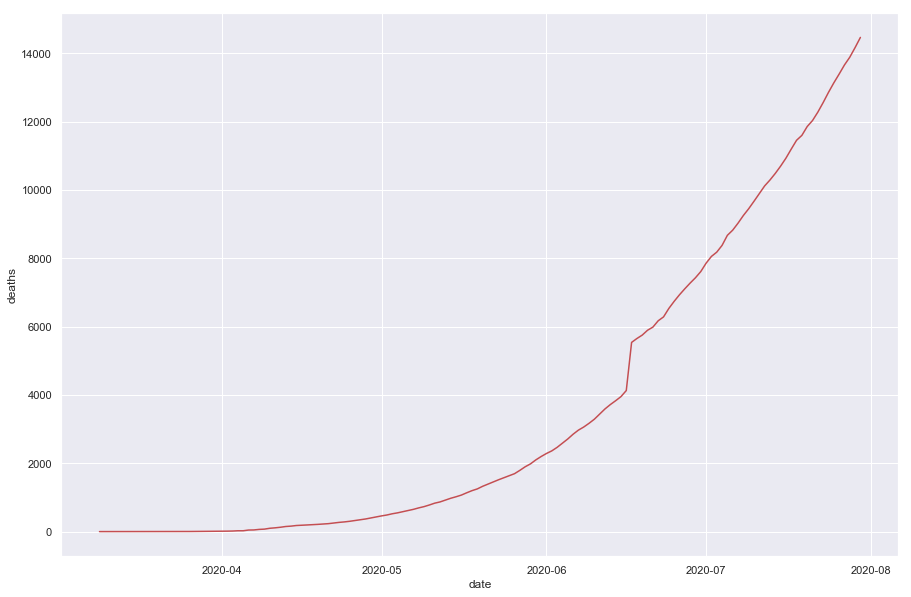

In [20]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=maha,color="r")#color=red
plt.show()

In [21]:
#kerala
kerala=df[df.state=='Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


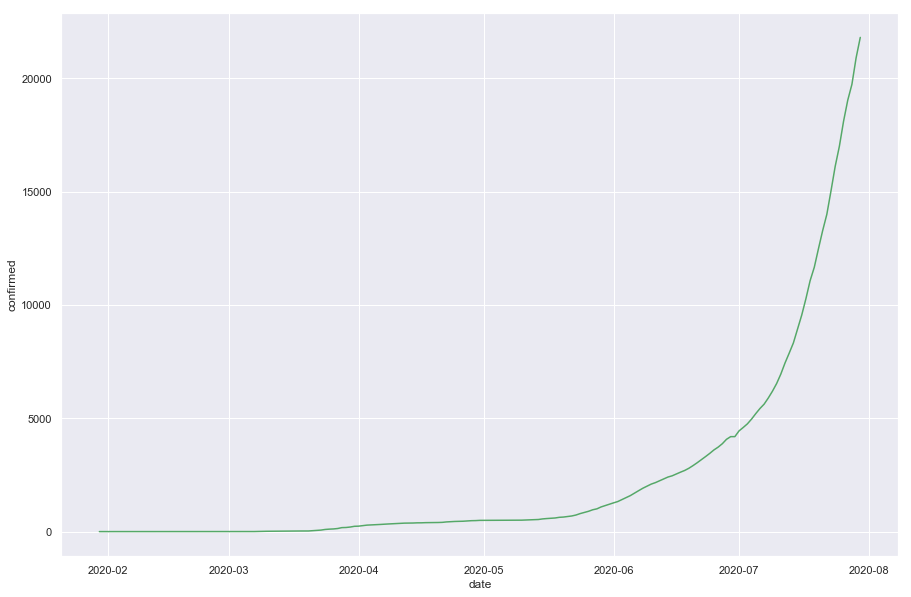

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")#color=green
plt.show()

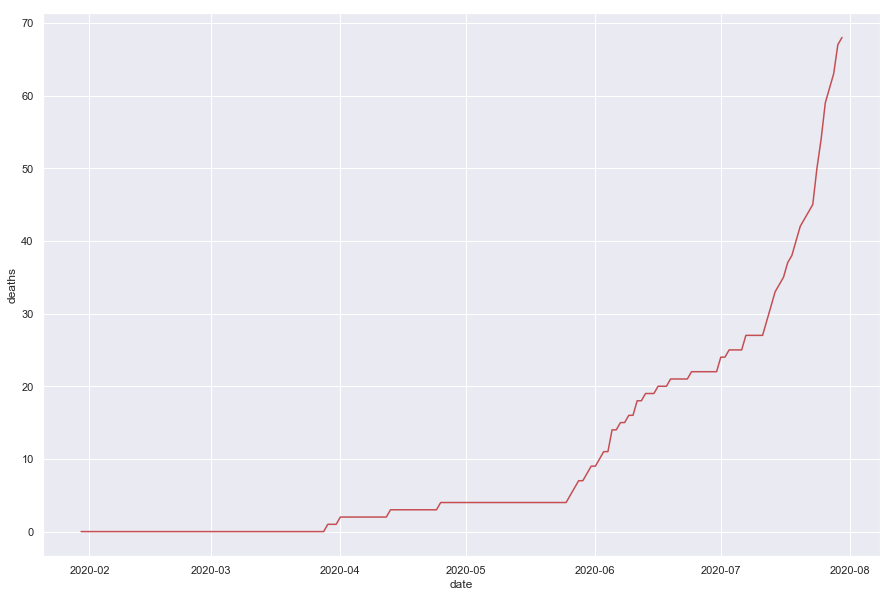

In [23]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")#color=red
plt.show()

In [24]:
#Checking state-wise testing details
tests=pd.read_csv('StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,NaN,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,NaN,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,NaN,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,NaN,33.0


In [25]:
test_latest=tests[tests.Date=='2020-07-29']
test_latest

,Date,State,TotalSamples,Negative,Positive
76,2020-07-29,Andaman and Nicobar Islands,23217.0,NaN,428.0
187,2020-07-29,Andhra Pradesh,1820009.0,1699619,120390.0
289,2020-07-29,Arunachal Pradesh,72739.0,70551,1410.0
381,2020-07-29,Assam,838043.0,NaN,36295.0
493,2020-07-29,Bihar,504629.0,NaN,45919.0
605,2020-07-29,Chandigarh,13327.0,12284,978.0
711,2020-07-29,Chhattisgarh,302506.0,NaN,8515.0
801,2020-07-29,Dadra and Nagar Haveli and Daman and Diu,41895.0,40411,1058.0
913,2020-07-29,Delhi,994219.0,NaN,133310.0
1020,2020-07-29,Goa,128289.0,NaN,5489.0


In [26]:
#Sorting the data w.r.t number of total samples
max_tests_State=test_latest.sort_values(by="TotalSamples",ascending=False)
max_tests_State

,Date,State,TotalSamples,Negative,Positive
3139,2020-07-29,Tamil Nadu,2536660.0,NaN,234114.0
3396,2020-07-29,Uttar Pradesh,2120843.0,NaN,77334.0
2120,2020-07-29,Maharashtra,2021437.0,1613560,407877.0
187,2020-07-29,Andhra Pradesh,1820009.0,1699619,120390.0
2942,2020-07-29,Rajasthan,1473098.0,1429523,39780.0
1695,2020-07-29,Karnataka,1275761.0,NaN,112504.0
913,2020-07-29,Delhi,994219.0,NaN,133310.0
3628,2020-07-29,West Bengal,856355.0,NaN,65258.0
381,2020-07-29,Assam,838043.0,NaN,36295.0
2005,2020-07-29,Madhya Pradesh,738986.0,704791,30134.0


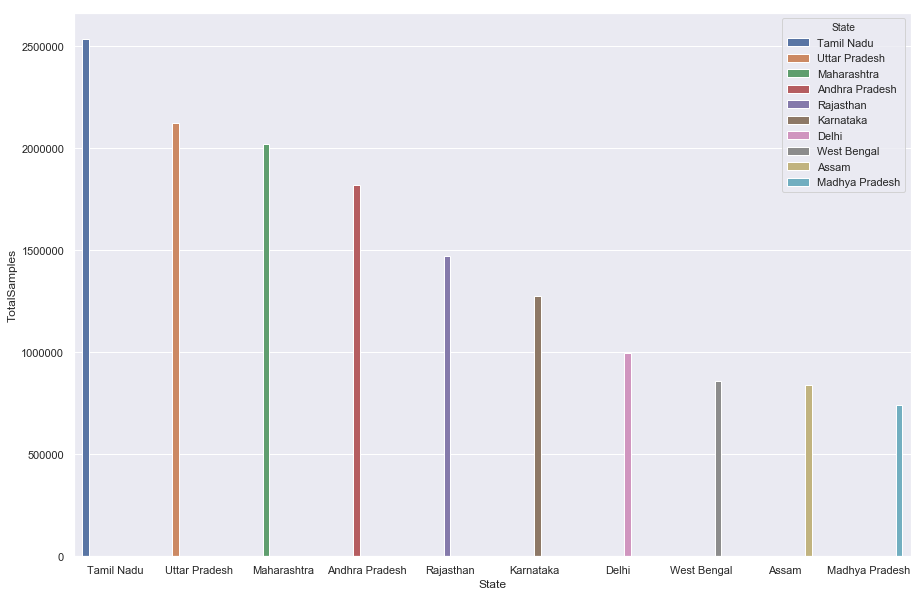

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="State",y="TotalSamples",data=max_tests_State[0:10],hue="State")
plt.show()

In [28]:

#analysis part completed

In [29]:
#Linear Regression 
#to predict the future number of cases in maharashtra
from sklearn.model_selection import train_test_split


In [30]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
146,2020-03-14,Maharashtra,0,0,14
153,2020-03-15,Maharashtra,0,0,32
167,2020-03-16,Maharashtra,0,0,32
182,2020-03-17,Maharashtra,0,1,39
197,2020-03-18,Maharashtra,0,1,42


In [31]:
#converting date-time to ordinal
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

C:\Users\NITISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [32]:
#getting 
x=maha['date']
y=maha['confirmed']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression


In [35]:
lr=LinearRegression()

In [36]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#lr.score(np.array(x_test).reshape(-1,1),np.array(y_test).reshape(-1,1))

In [38]:
lr.score(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

0.7962764506157858

In [39]:
maha.tail(10)

,date,state,cured,deaths,confirmed
4340,737627,Maharashtra,175029,12030,318695
4375,737628,Maharashtra,182217,12276,327031
4410,737629,Maharashtra,187769,12556,337607
4445,737630,Maharashtra,194253,12854,347502
4480,737631,Maharashtra,199967,13132,357117
4515,737632,Maharashtra,207194,13389,366368
4550,737633,Maharashtra,213238,13656,375799
4585,737634,Maharashtra,221944,13883,383723
4620,737635,Maharashtra,232277,14165,391440
4655,737636,Maharashtra,239755,14463,400651


In [40]:
lr.predict(np.array([[737700]]))

array([[441722.89121556]])

In [41]:
year = int(input('Enter a year'))
month = int(input('Enter a month'))
day = int(input('Enter a day'))
current_date = dt.date(year, month, day)
ordinal_date=current_date.toordinal()
value=lr.predict(np.array([[ordinal_date]]))
date_time = current_date.strftime("%m/%d/%Y")


Enter a year2020
Enter a month9
Enter a day22


In [42]:
print("Number of Cases on date "+date_time+" will be "+str(value[0]))

Number of Cases on date 09/22/2020 will be [415848.0712347]


In [43]:
lr.score(np.array(x_test).reshape(-1,1),np.array(y_test).reshape(-1,1))

0.7279112271549895